In [2]:
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("scRNAseq")

In [3]:
library("scRNAseq")
data <- scRNAseq::LawlorPancreasData()

Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Warning message:
"package 'SummarizedExperiment' was built under R version 3.6.2"Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Positi

In [4]:
head(colData(data))

DataFrame with 6 rows and 8 columns
                      title         age         bmi   cell type         disease
                <character> <character> <character> <character>     <character>
10th_C10_S104 10th_C10_S104          55        29.8  None/Other Type 2 Diabetic
10th_C11_S96   10th_C11_S96          55        29.8        Beta Type 2 Diabetic
10th_C13_S61   10th_C13_S61          55        29.8        Beta Type 2 Diabetic
10th_C14_S53   10th_C14_S53          55        29.8        Beta Type 2 Diabetic
10th_C16_S105 10th_C16_S105          55        29.8  None/Other Type 2 Diabetic
10th_C17_S97   10th_C17_S97          55        29.8        Beta Type 2 Diabetic
              islet unos id        race         Sex
                <character> <character> <character>
10th_C10_S104       ACIW009       White      Female
10th_C11_S96        ACIW009       White      Female
10th_C13_S61        ACIW009       White      Female
10th_C14_S53        ACIW009       White      Female
10th_C16_S10

In [5]:
disease = data$disease
unique(disease)

[1] "Type 2 Diabetic" "Non-Diabetic"

In [6]:
length(disease[which(disease=='Type 2 Diabetic')])
length(disease[which(disease=='Non-Diabetic')])

[1] 258

[1] 380

In [7]:
table(data$disease)


   Non-Diabetic Type 2 Diabetic 
            380             258 

In [8]:
colnames(colData(data))

[1] "title"         "age"           "bmi"           "cell type"    
[5] "disease"       "islet unos id" "race"          "Sex"

In [9]:
normcnt = counts(data) 
head(colnames(normcnt))

[1] "10th_C10_S104" "10th_C11_S96"  "10th_C13_S61"  "10th_C14_S53" 
[5] "10th_C16_S105" "10th_C17_S97"

In [10]:
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("scater")

In [11]:
library(scater)

cellQC <- perCellQCMetrics(data)
# head(cellQC)

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [12]:
colnames(cellQC)

[1] "sum"             "detected"        "percent_top_50"  "percent_top_100"
[5] "percent_top_200" "percent_top_500" "total"

In [13]:
colData(data) <- cbind(colData(data), cellQC)
colnames(colData(data))

[1] "title"           "age"             "bmi"             "cell type"      
 [5] "disease"         "islet unos id"   "race"            "Sex"            
 [9] "sum"             "detected"        "percent_top_50"  "percent_top_100"
[13] "percent_top_200" "percent_top_500" "total"

In [14]:
#?perCellQCMetrics

In [15]:
# head(cellQC)

In [16]:
cellQC[which(cellQC$sum==max(cellQC$sum)),]

DataFrame with 1 row and 7 columns
        sum  detected   percent_top_50  percent_top_100  percent_top_200
  <numeric> <integer>        <numeric>        <numeric>        <numeric>
1 3834270.5      9137 25.5982688232351 32.9139868978988 41.5941504387862
   percent_top_500     total
         <numeric> <numeric>
1 56.5584843322869 3834270.5

In [17]:
which(colData(data)$sum==max(colData(data)$sum))

[1] 529

In [18]:
colData(data)[which(colData(data)$sum==max(colData(data)$sum)), ]

DataFrame with 1 row and 15 columns
                  title         age         bmi   cell type      disease
            <character> <character> <character> <character>  <character>
7th-C76_S52 7th-C76_S52          29          23      Ductal Non-Diabetic
            islet unos id        race         Sex       sum  detected
              <character> <character> <character> <numeric> <integer>
7th-C76_S52       ACEL337       White        Male 3834270.5      9137
              percent_top_50  percent_top_100  percent_top_200  percent_top_500
                   <numeric>        <numeric>        <numeric>        <numeric>
7th-C76_S52 25.5982688232351 32.9139868978988 41.5941504387862 56.5584843322869
                total
            <numeric>
7th-C76_S52 3834270.5

In [19]:
colnames(data)[529]

[1] "7th-C76_S52"

In [20]:
# counts(data)

In [21]:
dim(data)

[1] 26616   638

In [22]:
counts = assay(data, "counts")
dim(counts[rowSums((counts) > 0), ])

[1] 22454   638

In [23]:
# counts[rowSums((counts) > 0), ]

In [24]:
length(data)

[1] 26616

In [25]:
length(counts)

[1] 16981008

In [26]:
# cnt = 0
# for (i in 1:length(counts)){
#     if (0 %in% counts[i,]) { }
#     else {cnt = cnt+ 1}
# }
# cnt

In [27]:
lista = numeric(nrow(data))
for (i in 1:nrow(data)){
lista[i]= count(data@assays@data@listData$counts[i,]>0) }

count(lista==ncol(data))

[1] 183

In [28]:
dim(counts[rowSums(counts)>0,])

[1] 22454   638

In [29]:
head(counts[counts==0,])

ERROR: Error in as(x, "generalMatrix")[i = i, , drop = TRUE]: invalid or not-yet-implemented 'Matrix' subsetting


In [30]:
count(rowSums(counts[rowSums(counts)>0,]))

[1] 705

In [ ]:
# head(counts)

In [31]:
counts(data) <- round(counts)
# head(counts(data))

In [ ]:
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("biomaRt")

In [32]:
library("biomaRt")
ensembl <- useMart("ensembl", dataset = "hsapiens_gene_ensembl", host = "grch37.ensembl.org")
annotation <- getBM(attributes = c('hgnc_symbol', 'ensembl_gene_id', 'chromosome_name', 
                                   'start_position', 'end_position'), 
                                filters = 'ensembl_gene_id',
                                values = rownames(data),
                                mart = ensembl)

Warning message:
"package 'biomaRt' was built under R version 3.6.3"Registered S3 method overwritten by 'openssl':
  method      from
  print.bytes Rcpp
Cache found


In [ ]:
head(annotation)

In [33]:
dim(annotation)

[1] 26631     5

In [34]:
dupplications = which(duplicated(annotation$ensembl_gene_id))

In [35]:
dim(annotation[-dupplications,])

[1] 26616     5

In [36]:
annotation = annotation[-dupplications,]

In [37]:
rowData(data) <- annotation

In [38]:
head(rownames(data))

[1] "ENSG00000229483" "ENSG00000232849" "ENSG00000229558" "ENSG00000232977"
[5] "ENSG00000227893" "ENSG00000238230"

In [39]:
dim(rowData(data)[rowData(data)$hgnc_symbol=='',])

[1] 6639    5

In [40]:
head(rowData(data))

DataFrame with 6 rows and 5 columns
                hgnc_symbol ensembl_gene_id chromosome_name start_position
                <character>     <character>     <character>      <integer>
ENSG00000229483     RABGAP1 ENSG00000011454               9      125703112
ENSG00000232849      RTFDC1 ENSG00000022277              20       55043647
ENSG00000229558        SNX1 ENSG00000028528              15       64386322
ENSG00000232977       IFT88 ENSG00000032742              13       21140585
ENSG00000227893       DAPK2 ENSG00000035664              15       64199235
ENSG00000238230       HSPA5 ENSG00000044574               9      127997132
                end_position
                   <integer>
ENSG00000229483    125867145
ENSG00000232849     55093943
ENSG00000229558     64438289
ENSG00000232977     21265503
ENSG00000227893     64364232
ENSG00000238230    128003609

In [ ]:
head(rownames(data)) 

In [41]:
rownames(data) <- ifelse(rowData(data)$hgnc_symbol=="", rowData(data)$ensembl_gene_id, rowData(data)$hgnc_symbol)

In [42]:
#5
kbpLength <-abs(rowData(data)$end_position- rowData(data)$start_position)/1000
rowData(data)$kbpLength <- kbpLength

In [43]:
max(rowData(data)$kbpLength)

[1] 2304.637

In [44]:
rowData(data)[which(rowData(data)$kbpLength==max(rowData(data)$kbpLength)),]

DataFrame with 1 row and 6 columns
        hgnc_symbol ensembl_gene_id chromosome_name start_position end_position
        <character>     <character>     <character>      <integer>    <integer>
CNTNAP2     CNTNAP2 ENSG00000174469               7      145813453    148118090
        kbpLength
        <numeric>
CNTNAP2  2304.637

In [45]:
#Normalizacja logarytmiczna
normcounts(data) <- log2(counts(data)+1)

In [46]:
ensembl = useMart("ensembl", dataset="hsapiens_gene_ensembl")
head(listAttributes(ensembl))

name,description,page
ensembl_gene_id,Gene stable ID,feature_page
ensembl_gene_id_version,Gene stable ID version,feature_page
ensembl_transcript_id,Transcript stable ID,feature_page
ensembl_transcript_id_version,Transcript stable ID version,feature_page
ensembl_peptide_id,Protein stable ID,feature_page
ensembl_peptide_id_version,Protein stable ID version,feature_page


In [47]:
#TPM
data <- getBMFeatureAnnos(data,filters = "ensembl_gene_id",
                          attributes = c("ensembl_gene_id", "hgnc_symbol", "start_position", "end_position"),
                        dataset = "hsapiens_gene_ensembl")

kbpLength <-abs(rowData(data)$end_position- rowData(data)$start_position)/1000
tpm(data) <- calculateTPM(data,kbpLength)

Cache found


In [48]:
data <- logNormCounts(data)

In [49]:
head(colData(data))

DataFrame with 6 rows and 15 columns
                      title         age         bmi   cell type         disease
                <character> <character> <character> <character>     <character>
10th_C10_S104 10th_C10_S104          55        29.8  None/Other Type 2 Diabetic
10th_C11_S96   10th_C11_S96          55        29.8        Beta Type 2 Diabetic
10th_C13_S61   10th_C13_S61          55        29.8        Beta Type 2 Diabetic
10th_C14_S53   10th_C14_S53          55        29.8        Beta Type 2 Diabetic
10th_C16_S105 10th_C16_S105          55        29.8  None/Other Type 2 Diabetic
10th_C17_S97   10th_C17_S97          55        29.8        Beta Type 2 Diabetic
              islet unos id        race         Sex              sum  detected
                <character> <character> <character>        <numeric> <integer>
10th_C10_S104       ACIW009       White      Female 641239.879999999      7018
10th_C11_S96        ACIW009       White      Female       1334918.53      8191
10th_C1

In [50]:
metaQC <- getVarianceExplained(data, variables=c("age", "bmi", "cell type", "disease", "race", "Sex"))
head(metaQC)

,age,bmi,cell type,disease,race,Sex
RABGAP1,NaN,NaN,NaN,NaN,NaN,NaN
RTFDC1,NaN,NaN,NaN,NaN,NaN,NaN
SNX1,1.282148,1.282148,0.8518124,0.02298882,0.65061319,0.4044367
IFT88,2.020657,2.020657,1.2016890,0.19188167,0.09187574,1.2728552
DAPK2,1.574716,1.574716,6.7556455,0.67516573,0.50346769,0.2185590
HSPA5,NaN,NaN,NaN,NaN,NaN,NaN


Warning message:
"Removed 25254 rows containing non-finite values (stat_density)."

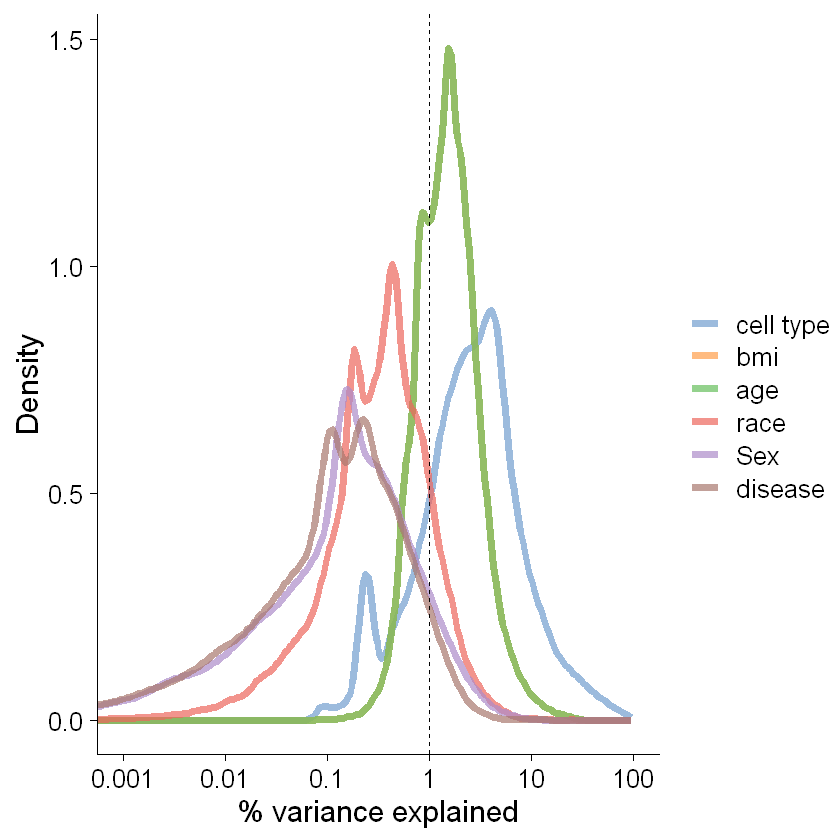

In [51]:
plotExplanatoryVariables(metaQC, theme_size=18)

Warning message:
"Removed 42090 rows containing non-finite values (stat_density)."

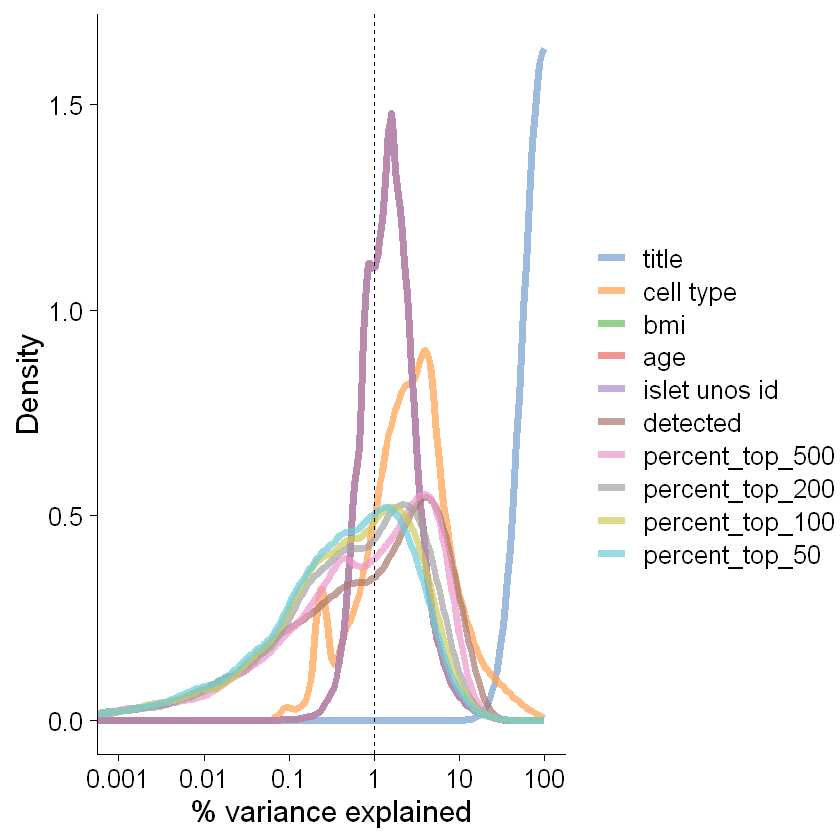

In [52]:
plotExplanatoryVariables(data, theme_size=18)

In [ ]:
# install.packages("Rtsne")
# library("Rtsne")

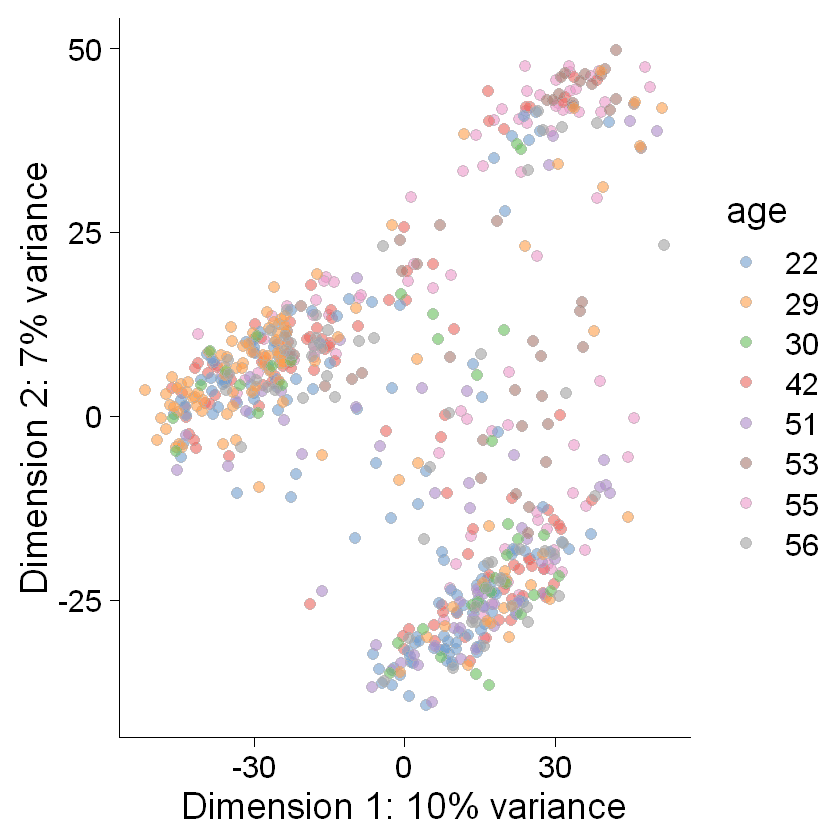

In [53]:
data <- runPCA(data)
set.seed(123)
data <- runTSNE(data, perplexity =10)
plotReducedDim(data, dimred = "PCA", colour_by = "age", theme_size=22, point_size=3)

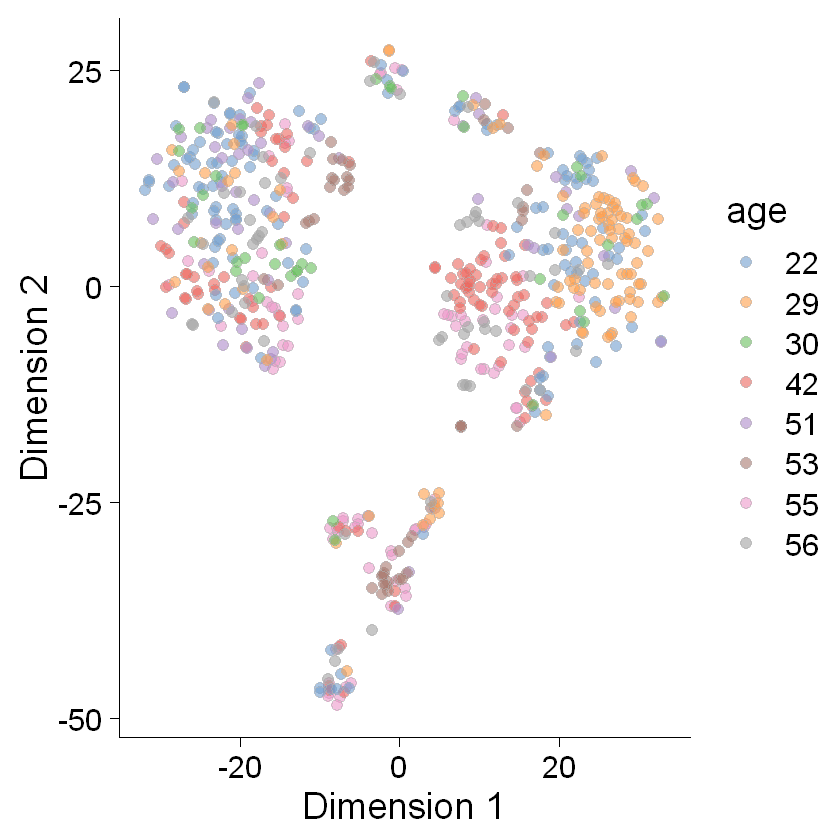

In [55]:
plotReducedDim(data, dimred="TSNE", colour_by = "age",theme_size = 22, point_size=3)

In [56]:
reducedDimNames(data) 

[1] "PCA"  "TSNE"

In [57]:
reducedDimNames(data)

[1] "PCA"  "TSNE"

In [ ]:
# install.packages("Seurat")
# library(Seurat)

In [58]:
umap <- calculateUMAP(data)
data <- runUMAP(data)

# umap(data) <- RunUMAP(data, reduction = "PCA", dims = 1:200)


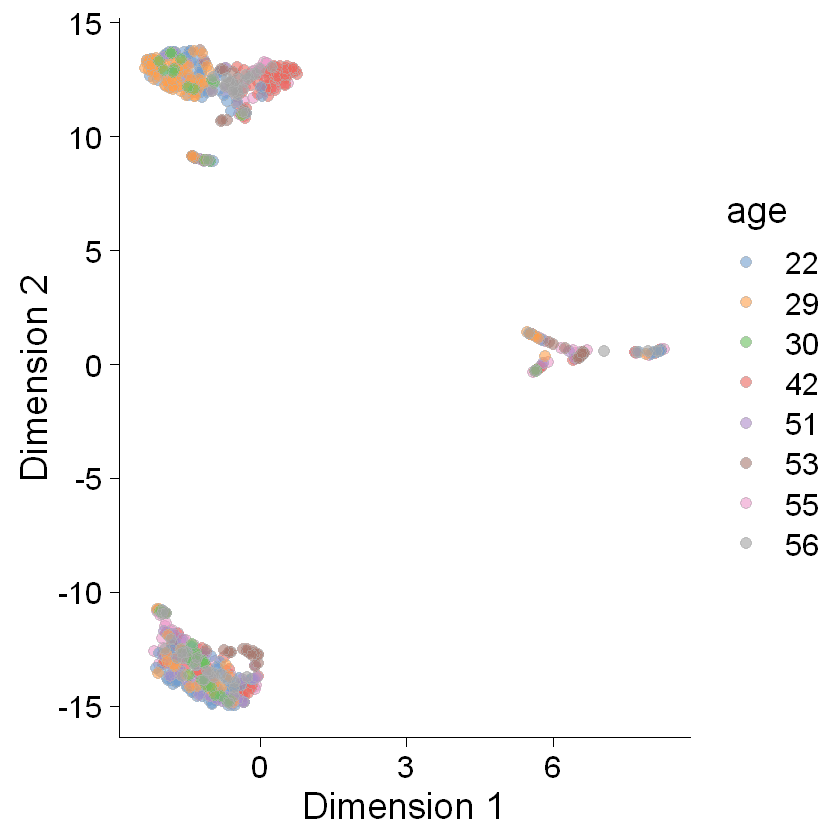

In [59]:
plotReducedDim(data, dimred="UMAP", colour_by = "age",theme_size = 22, point_size=3)

In [60]:
# saveRDS(data, "data_NGS.rds")